<Figure size 720x720 with 0 Axes>

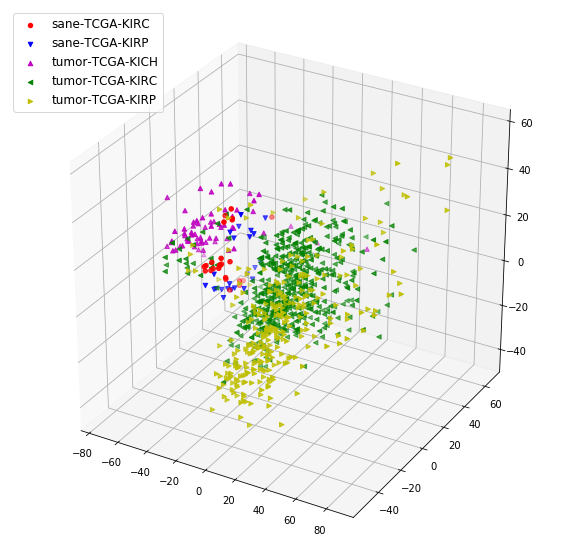

meth
miRNA
mRNA


<Figure size 720x720 with 0 Axes>

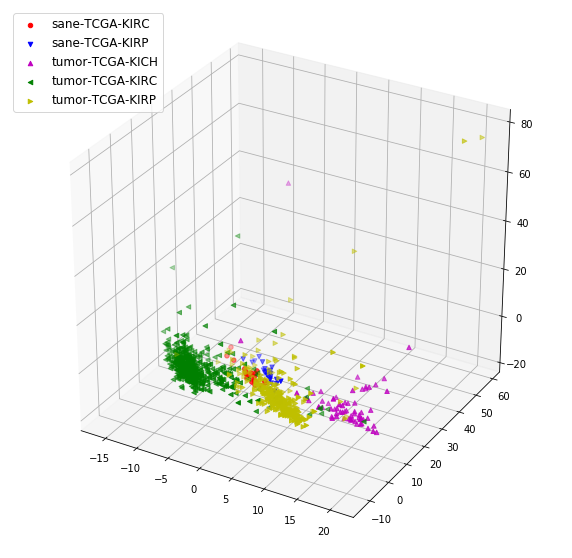

<Figure size 720x720 with 0 Axes>

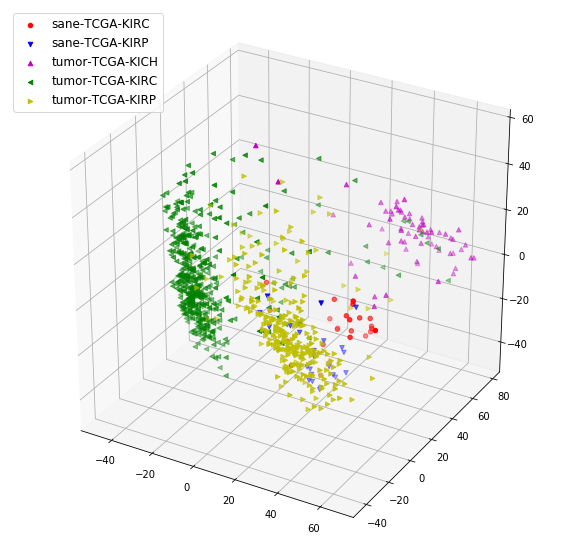

In [6]:
from itertools import cycle, islice
import sys
sys.path.append('../')
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
seed=1200
annotation_path="../Data/data/preprocessed_annotation_global.csv"
y = pd.read_csv(annotation_path)["label"]
names=y.astype('category').cat.categories
y=y.astype('category').cat.codes

modelname=" svm "
meth_path="../Data/data/preprocessed_Matrix_meth.csv"
mRNA_path="../Data/data/preprocessed_Matrix_miRNA_deseq_correct.csv"
mRNA_normalized_path="../Data/data/preprocessed_Matrix_mRNA_deseq_normalized_prot_coding_correct.csv"
files=[meth_path,mRNA_path,mRNA_normalized_path]
filenames=["meth","miRNA","mRNA"]
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 10,20],'random_state':[seed]}

for file,filename in zip(files,filenames):
    outputname=modelname+filename
    
    X= pd.read_csv(file,index_col=False,header=None)
    #X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=seed,stratify=y)
    pca= PCA(n_components=3)
    X= pca.fit_transform(X)
    fig = plt.figure(figsize=(10,10))
    colors = np.array(list(islice(cycle(['r', 'b', 'm', 'g', 'y', 'y', 'k']), 5)))
    markers = np.array(list(islice(cycle(['o', 'v', '^', '<', '>', '8', 's']), 5)))
    lista = [1,-1]

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    for l, c, m,n in zip([0,1,2,3,4], colors, markers,names):
        ax.scatter(X[y == l, 0], X[y == l, 1], X[y == l, 2], c=c, marker=m,label ='%s' % n)
    ax.legend(loc='upper left', fontsize=12)
    plt.savefig("./pca-visualization-" + filename + ".png")
    plt.show()

    print(filename)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 910 but corresponding boolean dimension is 911

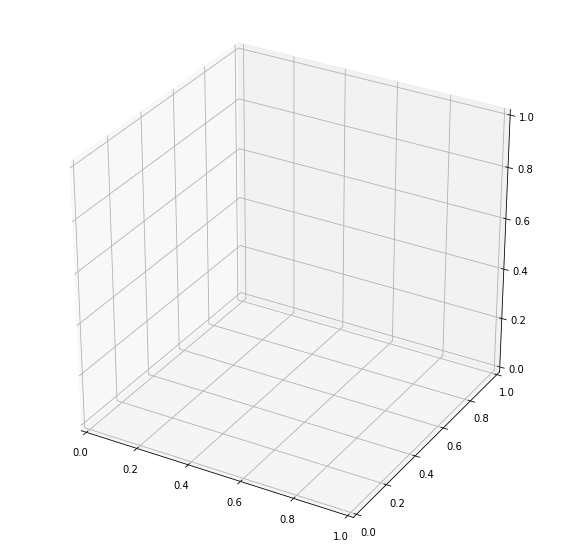

In [7]:
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
seed=1200

annotation_path="./data/annotation_global.csv"

meth_path="./data/Matrix_meth.csv"
mRNA_path="./data/Matrix_miRNA_deseq_correct.csv"
mRNA_normalized_path="./data/Matrix_mRNA_deseq_normalized_prot_coding_correct.csv"
files=[meth_path,mRNA_path,mRNA_normalized_path]
filenames=["meth","mrna","micro mrna"]
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 10,20],'random_state':[seed]}

def union(row):
    return str(row["is_tumor"])+"-"+row["project_id"]
def map(row):
    return str(row["case_id"])+"_"+str(row["is_tumor"])

data = pd.read_csv("./original/annotation_global.csv", sep='\t')
data["case_id"]=data.apply(lambda row: map(row),axis=1)
#cases_removed=data[data["project_id"]=="TCGA-SARC"]
#data= data[data["project_id"]!="TCGA-SARC"]
data["is_tumor"]=data["is_tumor"].map({0: 'sane', 1: 'tumor'})
data["label"]=data.apply(lambda row: union(row),axis=1)
y=data.sort_values(by="case_id")
data.to_csv("./data/annotation_global.csv",index=False)


y = pd.read_csv("./data/annotation_global.csv")["label"]
names=y.astype('category').cat.categories
y=y.astype('category').cat.codes

for file,filename in zip(files,filenames):
    outputname=modelname+filename
    
    X= pd.read_csv(file)
    #X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=seed,stratify=y)
    pca= PCA(n_components=3)
    X= pca.fit_transform(X)
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.scatter(X[y==0,0],X[y==0,1],X[y==0,2],c='r')
    ax.scatter(X[y==1,0],X[y==1,1],X[y==1,2],c='b')
    ax.scatter(X[y==2,0],X[y==2,1],X[y==2,2],c='g')
    ax.scatter(X[y==3,0],X[y==3,1],X[y==3,2],c='m')
    ax.scatter(X[y==4,0],X[y==4,1],X[y==4,2],c='y')
    print(filename)

In [ ]:
X.shape